Links to

[scikit NN](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [40]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [34]:
# Get data
df = pd.read_pickle('original_images.pkl')

In [3]:
# Use only a subset of the images
df = df[df["Identity"]<10] # The 100 first identities

In [35]:
# Choose which columns to be data, X, and target, y.
X_name = "Image" # The data to be categorized, should be "Image"
y_name = "Finger" # The target label. In the end, Identity
X = list(df["Image"])
y = df[y_name]

In [25]:
X = [x/255 for x in X] # Scale the data to be in range [0,1]

In [36]:
# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [38]:
model.score(X_test,y_test)

0.19833333333333333

Text(33.0, 0.5, 'Truth')

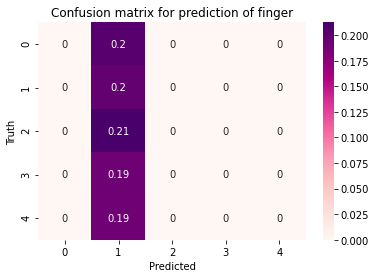

In [41]:
# Predict class for X.
y_predicted = model.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_predicted, normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=True, cmap='RdPu')
plt.title('Confusion matrix for prediction of '+y_name.lower())
plt.xlabel('Predicted')
plt.ylabel('Truth')